# Contour Plot Verification

In [1]:
# Set the path
import sys
sys.path.append("/home/mwsrgf/proj/ACT")

from act.cell_model import ACTCellModel
from act.simulator import ACTSimulator
from act.act_types import SimulationParameters, ConstantCurrentInjection, FilterParameters, ConductanceOptions, OptimizationParameters
from act.data_processing import ACTDataProcessor as dp
from act.act_module import ACTModule, ACTModuleParameters
from act.Metrics import Metrics

import numpy as np
import matplotlib.pyplot as plt

/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


In [2]:
sim_par = SimulationParameters(
    sim_name = "spiker_orig_train",
    h_celsius = 6.3,
    h_dt = 0.1,
    h_tstop = 1000,
    CI = [ConstantCurrentInjection(amp = 0.1, dur = 700, delay = 100, lto_hto = 0),
          ConstantCurrentInjection(amp = 0.5, dur = 700, delay = 100, lto_hto = 0),
          ConstantCurrentInjection(amp = 1.0, dur = 700, delay = 100, lto_hto = 0)])

final_folder = "output/spiker_orig"

## Feature MAE Contour Plot

Smallest MAE values (gnabar_hh_spiker, gkbar_hh_spiker, Summary Stats MAE): 
[[1.37168360e-01 3.89201698e-02 9.32029069e-01]
 [1.07690104e-01 3.19166738e-02 1.63968018e+00]
 [1.37168360e-01 3.19166738e-02 3.77415011e+04]
 [1.07690104e-01 3.89201698e-02 2.70380888e+05]
 [1.37168360e-01 4.59236658e-02 2.70381171e+05]
 [1.07690104e-01 4.59236658e-02 5.03038938e+05]]


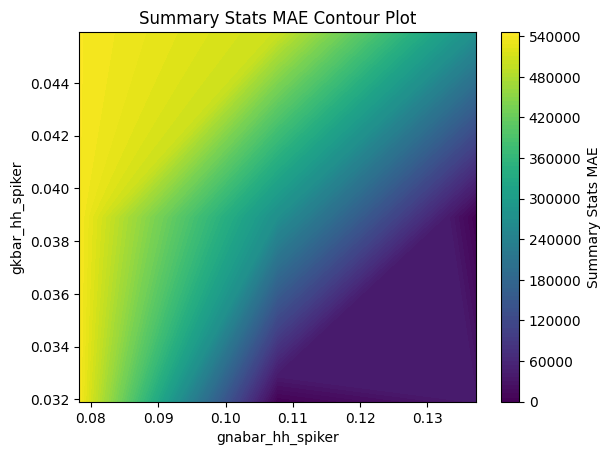

In [3]:

from act import ACTPlot as actplt
g_names = ["gnabar_hh_spiker", "gkbar_hh_spiker"]

for i in range(len(g_names)-1):
    actplt.plot_training_feature_mae_contour_plot(
        final_folder,
        sim_par.CI,
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats", "lto-hto_amplitude", "lto-hto_frequency"],
        threshold=0,
        first_n_spikes=20,
        num_levels=100,
        results_filename=f"{final_folder}/results/Feature_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )



## FI MAE Contour Plot

Smallest FI MAE values (gnabar_hh_spiker, gkbar_hh_spiker, FI MAE): 
[[1.07690104e-01 3.19166738e-02 4.23809524e+01]
 [1.37168360e-01 3.89201698e-02 5.57142857e+01]
 [1.37168360e-01 3.19166738e-02 1.38571429e+02]
 [1.37168360e-01 4.59236658e-02 2.12380952e+02]
 [1.07690104e-01 3.89201698e-02 3.27619048e+02]
 [1.07690104e-01 4.59236658e-02 3.97142857e+02]]


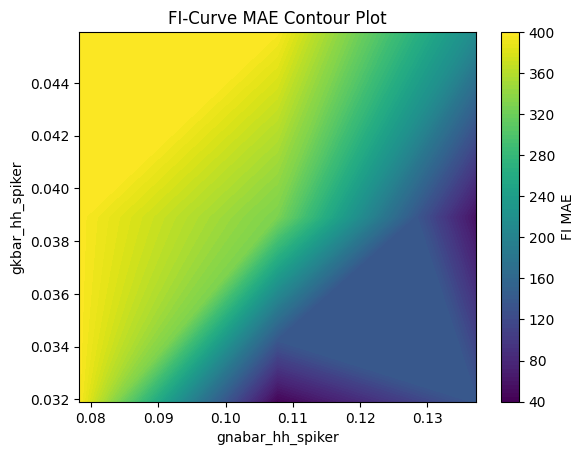

In [4]:

from act import ACTPlot as actplt

g_names = ["gnabar_hh_spiker", "gkbar_hh_spiker"]

for i in range(len(g_names)-1):
    actplt.plot_training_fi_mae_contour_plot(
        final_folder,
        sim_par.CI, 
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        spike_threshold=0,
        results_filename=f"{final_folder}/results/FI_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )


## Voltage MAE Contour Plot

Smallest MAE values (gnabar_hh_spiker, gkbar_hh_spiker, V MAE): 
[[ 0.07821185  0.03892017  9.54628031]
 [ 0.07821185  0.04592367  9.64266212]
 [ 0.07821185  0.03191667 10.19954215]
 [ 0.1076901   0.03892017 11.2528181 ]
 [ 0.1076901   0.04592367 11.43858386]
 [ 0.13716836  0.04592367 12.25464496]]


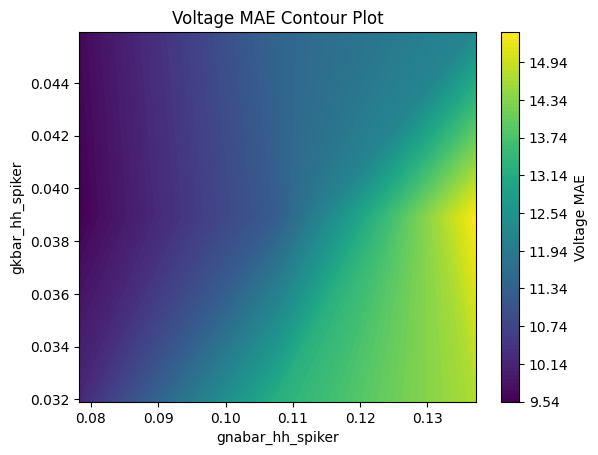

In [5]:
from act import ACTPlot as actplt

g_names = ["gnabar_hh_spiker", "gkbar_hh_spiker"]

for i in range(len(g_names)-1):
    actplt.plot_training_v_mae_contour_plot(
        final_folder,
        sim_par.CI, 
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        results_filename=f"{final_folder}/results/Voltage_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )